In [1]:
#Enable autoreloading of imported modules
%load_ext autoreload
%autoreload 2

#Import required packages
import sys,os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import kagglehub

#Add the repo root (one level up from this notebook) to sys.path
sys.path.insert(0, os.path.abspath("../"))

In [2]:
#Install necessary resources from nltk
import nltk

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\phili\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\phili\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phili\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\phili\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Load data

In [ ]:
#Download latest version of dataset
print("Load or download dataset...")
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset") #path to downloaded dataset
#   (if already downloaded, will not download again)

fake_path=os.path.join(path, "Fake.csv")    #path to dataset with true news
true_path=os.path.join(path, "True.csv")    #path to dataset with fake news

#Read into dataframes
print("Loading fake.csv ...")
fake_df=pd.read_csv(fake_path)
print("Loading true.csv ...")
true_df=pd.read_csv(true_path)

#Label data (1=true, 0=fakenews)
true_df['label']=1
fake_df['label']=0

#Join dataframes
df=pd.concat([true_df, fake_df])
print("Done")


Load or download dataset...
Loading fake.csv ...
Loading true.csv ...
Done


In [14]:
from extensions.vectorization_and_tokenization import multi_column_vectorizer
from courselib.utils.splits import train_test_split
from courselib.utils.metrics import binary_accuracy
from courselib.utils.normalization import standardize
from extensions.sparse_array_compatible_models import LogisticRegression_S
from courselib.optimizers import GDOptimizer

In [7]:
training_data_fraction=.8

df_, train_df, test_df=train_test_split(df, training_data_fraction=training_data_fraction, return_numpy=False)
Y_train=train_df['label'].to_numpy()
Y_test=test_df['label'].to_numpy()

In [10]:
#vectorize

columns=['title']


vectorizer=multi_column_vectorizer(columns)
X_train=vectorizer.fit_transform(train_df, columns)
X_test=vectorizer.transform(test_df, columns)

In [12]:
feature_names=vectorizer.get_feature_names_out()
feature_names

{'title': array(['00', '000', '000m', ..., 'zurich', 'état', 'žižek'],
       shape=(19567,), dtype=object)}

In [24]:
lr=10 # learining rate

epochs=10000 # number of epochs
bs=len(train_df) # batch size


optimizer=GDOptimizer(learning_rate=lr)

In [25]:
# Initialize model
w=np.zeros(X_train.shape[1]) # initial weights
b=0 # initial bias
model=LogisticRegression_S(w,b,optimizer)

#Train model
model.fit(X_train, Y_train, num_epochs=epochs, batch_size=bs)

#Evaluate:
train_accuracy=np.round(binary_accuracy(y_pred=model(X_train), y_true=Y_train, class_labels=[0,1]), 4)
test_accuracy=np.round(binary_accuracy(y_pred=model(X_test), y_true=Y_test, class_labels=[0,1]), 4)

print(f"Train accuracy: {train_accuracy}%")
print(f"Test accuracy: {test_accuracy}%")

Train accuracy: 98.2794%
Test accuracy: 95.6236%


[]

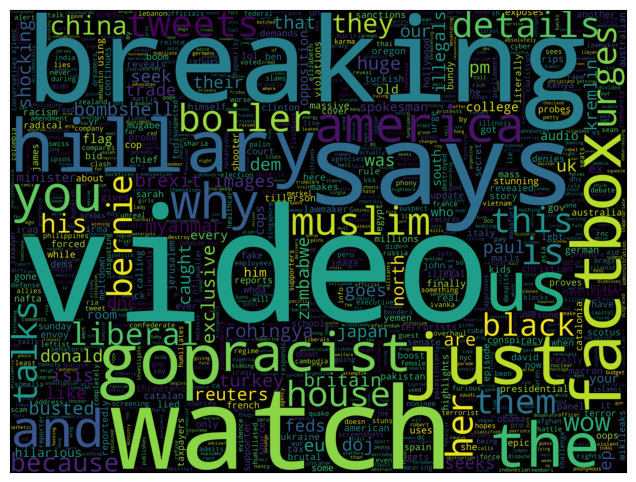

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from courselib.utils.normalization import min_max

weights=np.abs(model.w)



fig, ax=plt.subplots(figsize=(15,6))
word_importance={word: weight for (word,weight) in zip(feature_names[columns[0]], weights)}
wordcloud=WordCloud(max_words=1000, width=8000, height=6000).generate_from_frequencies(word_importance)
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_xticks([])
ax.set_yticks([])



In [27]:
vectorizer=multi_column_vectorizer(columns, ngram_range=(2,2))
X_train=vectorizer.fit_transform(train_df, columns)
X_test=vectorizer.transform(test_df, columns)
feature_names=vectorizer.get_feature_names_out()


# Initialize model
w=np.zeros(X_train.shape[1]) # initial weights
b=0 # initial bias
model=LogisticRegression_S(w,b,optimizer)

#Train model
model.fit(X_train, Y_train, num_epochs=epochs, batch_size=bs)

#Evaluate:
train_accuracy=np.round(binary_accuracy(y_pred=model(X_train), y_true=Y_train, class_labels=[0,1]), 4)
test_accuracy=np.round(binary_accuracy(y_pred=model(X_test), y_true=Y_test, class_labels=[0,1]), 4)

print(f"Train accuracy: {train_accuracy}%")
print(f"Test accuracy: {test_accuracy}%")



Train accuracy: 99.4905%
Test accuracy: 92.5278%


[]

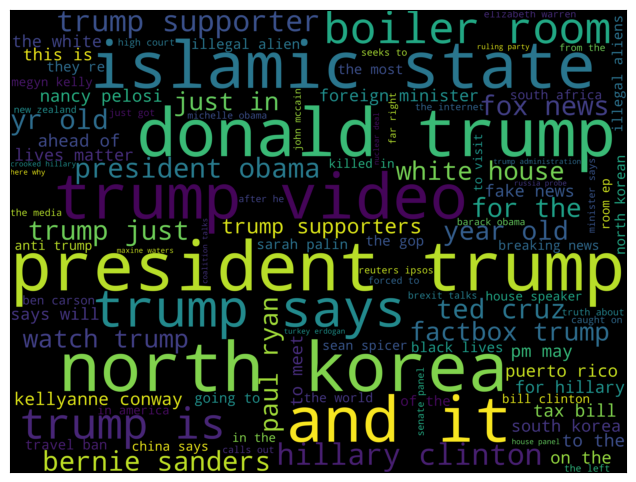

In [32]:
weights=np.abs(model.w)



fig, ax=plt.subplots(figsize=(15,6))
word_importance={word: weight for (word,weight) in zip(feature_names[columns[0]], weights)}
wordcloud=WordCloud(max_words=100, width=8000, height=6000).generate_from_frequencies(word_importance)
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_xticks([])
ax.set_yticks([])